In [74]:
# import some necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Try tSNE Plot
from sklearn.manifold import TSNE
# Try Afiinity Propagation for Clustering
from sklearn.cluster import AffinityPropagation

# Scikit Learn Incremental PCA method
from sklearn.decomposition import IncrementalPCA

def openfile(fname):
    df = pd.read_table(fname)
    df1 = df.T
    df1 = df1.drop(['GENE'],axis=0)
    data = df1.values
    return data

def PCA(data):
    X = data
    ipca = IncrementalPCA(n_components=100, batch_size=500)
    X_ipca = ipca.fit_transform(X)
    return X_ipca

def tSNE(data):
    return TSNE(n_components=2,early_exaggeration=50,perplexity=300,verbose=100).fit_transform(data)

def AffinityPropagation(data):
    Y = AffinityPropagation(preference=-50).fit(data)
    cluster_centers_indices = Y.cluster_centers_indices_
    labels = Y.labels_
    return

In [77]:
if __name__ == "__main__":
    X = openfile("./Unprocessed_data/Gland.tsv")
    Y = AffinityPropagation(X)
    print(Y)
    # Applying TSNE
    # X_tsne = tSNE(X)
    # Applying PCA
    # X_PCA = PCA(data)


        
    """
    results = PCA(data)
    results = results.tolist()
    length = len(results[0])
    header = ['GENE' for i in range(length)]
    results.insert(0,header)
    with open('./Processed_Gland_withoutPCA.tsv', 'w') as tsvfile:
        writer = csv.writer(tsvfile, delimiter='\t', lineterminator='\n')
        for rows in results:
            writer.writerow(rows)
    """
    


TypeError: AffinityPropagation() got an unexpected keyword argument 'preference'

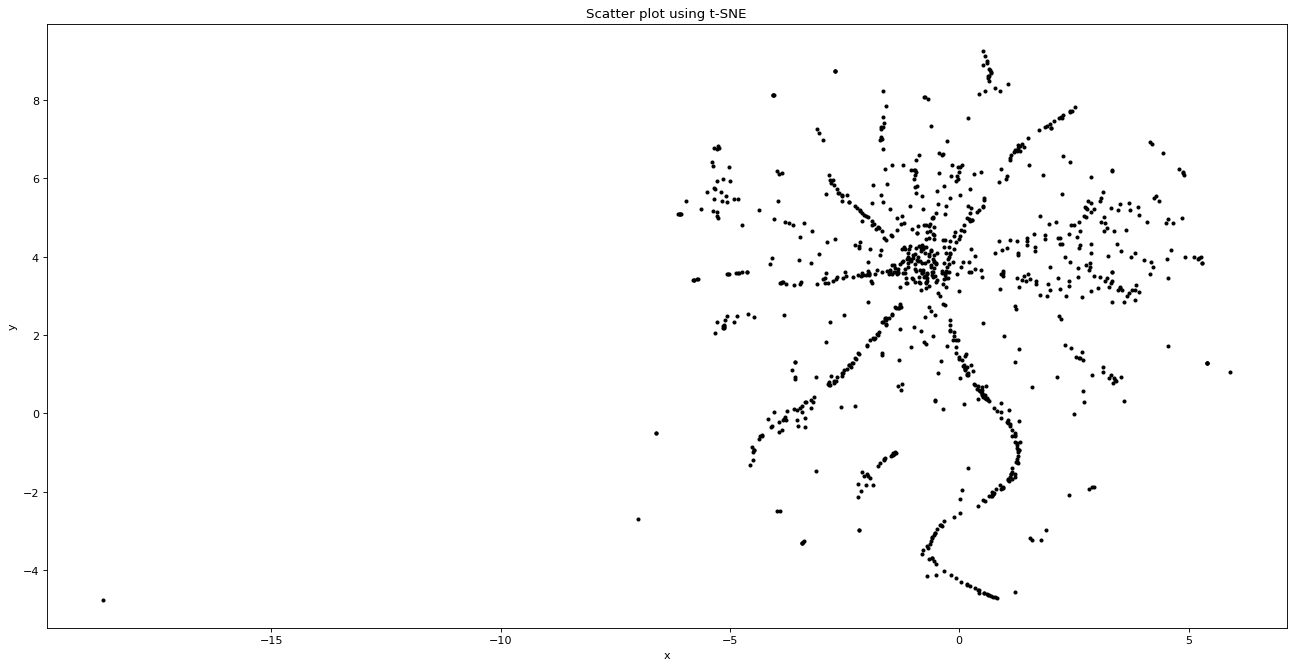

In [46]:
# Plotting the tSNE graph
X = X_tsne[:,0]
Y = X_tsne[:,1]
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X,Y,s=7,c='black')
plt.title('Scatter plot using t-SNE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

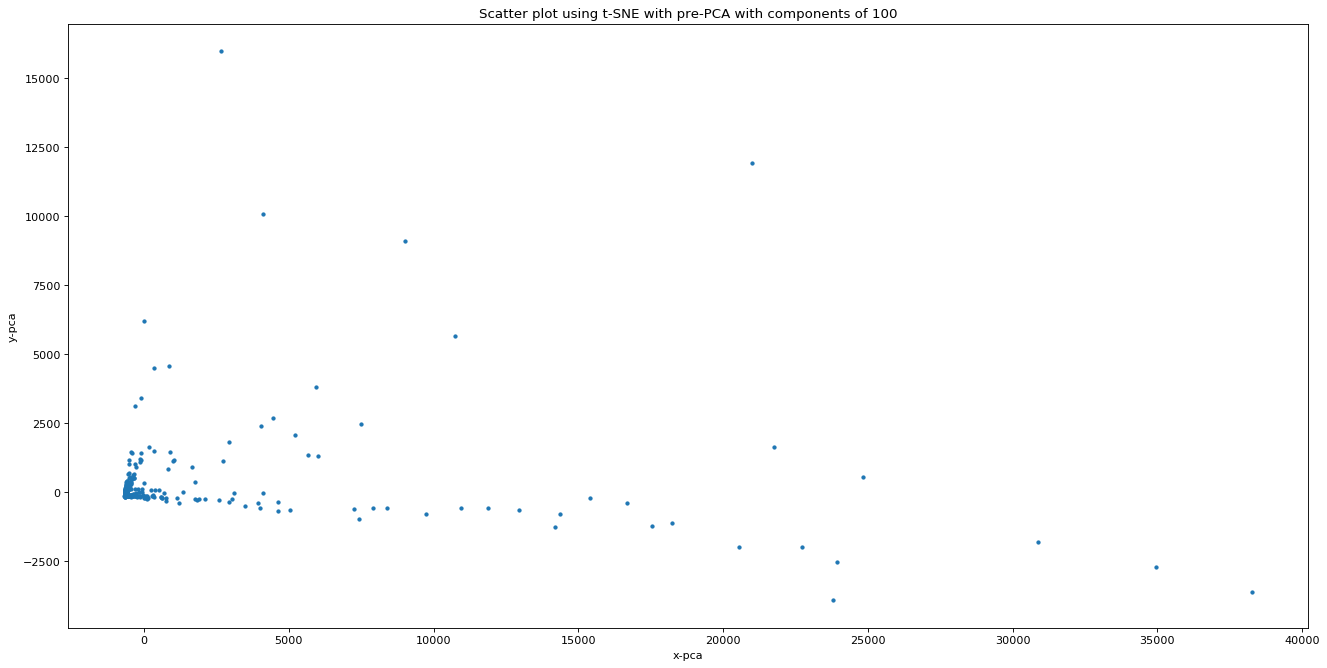

In [44]:
X_PCA_x = X_PCA[:,0]
Y_PCA_y = X_PCA[:,1]
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_PCA_x,Y_PCA_y,s=8)
plt.title('Scatter plot using t-SNE with pre-PCA with components of 100')
plt.xlabel('x-pca')
plt.ylabel('y-pca')
plt.show()
